"""
@Author : Saniya Shaikh
@Date   : 10th Mar 2023
@Goal : Heart Disease Predicator Application Using K-Nearest Neighbors (KNN) Algorithm.
"""

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Load the dataset**

In [2]:
df = pd.read_csv('/kaggle/input/heart-prediction/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df['Sex'].replace(to_replace=['M','F'],value=[1,2],inplace=True)
df['ChestPainType'].replace(to_replace=['ATA','NAP','ASY','TA'],value=[1,2,3,4],inplace=True)
df['RestingECG'].replace(to_replace=['Normal','ST','LVH'],value=[1,2,3],inplace=True)
df['ExerciseAngina'].replace(to_replace=['N','Y'],value=[1,2],inplace=True)
df['ST_Slope'].replace(to_replace=['Up','Flat','Down'],value=[1,2,3],inplace=True)

In [7]:
df.shape

(918, 12)

In [9]:
len(df[df['Cholesterol']==0])

172

In [10]:
print(len(df[df['RestingBP']==0]))
df[df['RestingBP']==0]

1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,1,2,0,0,0,1,155,1,1.5,2,1


In [17]:
# After filling null values with mean

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [18]:
df['HeartDisease'].value_counts()

#  [1: heart disease, 0: Normal]

1    508
0    409
Name: HeartDisease, dtype: int64

In [27]:
X = df.drop('HeartDisease',axis=1)
Y = df['HeartDisease']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=5)

# # K-Nearest Neighbors (KNN)

In [29]:
# At first we have to do standard scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train)
X_test_knn = scaler.transform(X_test)

**Method -1 : Rule of thumb** 

**In this method we will find k by k=sqrt(n) ; where n is number of rows in training set
One thing to remember that it is recommended the use the odd value because it helps in avoiding ties when the algorithm tries to assign a class label to the test instance.** 

In [31]:
k = np.sqrt(X_train_knn.shape[0])
print('The value of k is ',k)

The value of k is  27.073972741361768


In [32]:
# Setting the value of k as 27

k = 27

**So after applying the first method we are getting the value of k is 27**

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)

In [34]:
# Train our model

knn.fit(X_train_knn,Y_train)

KNeighborsClassifier(n_neighbors=27)

In [35]:
Y_pred_knn = knn.predict(X_test_knn)

**Model evaluation**

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred_knn)

0.8695652173913043

**In our case, an accuracy score of 0.86 means that our KNN model correctly classified 86% of the instances in this dataset. This is a fairly good accuracy score and suggests that our model is performing reasonably well.**

**Method 2 - Trial and error**

**This method is preety straightforward, we just have to run a for loop to check the value of k from 1 to 30 and then decide which one is more appropriate.**

[0.8586956521739131, 0.8315217391304348, 0.8695652173913043, 0.875, 0.875, 0.8804347826086957, 0.8858695652173914, 0.8695652173913043, 0.875, 0.8586956521739131, 0.875, 0.875, 0.8858695652173914, 0.875, 0.8858695652173914, 0.875, 0.8804347826086957, 0.875, 0.875, 0.8641304347826086, 0.875, 0.8695652173913043, 0.8858695652173914, 0.8804347826086957, 0.8858695652173914, 0.8695652173913043, 0.8695652173913043, 0.8532608695652174, 0.8641304347826086, 0.8641304347826086]


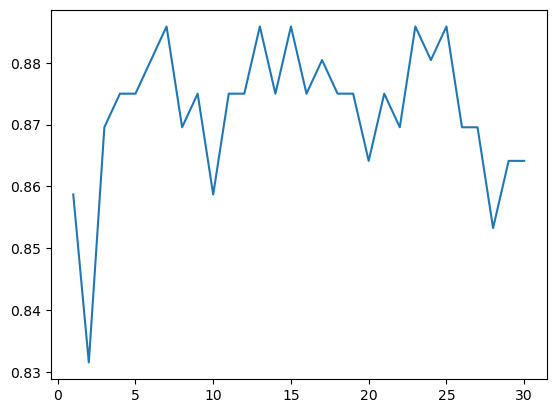

In [38]:
accuracy = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_knn,Y_train)
    accuracy.append(accuracy_score(Y_test,knn.predict(X_test_knn)))
    
plt.plot(range(1,31),accuracy)
print(accuracy)


**We can see that if we take the value of k=7,then the accuracy will be about 88% 
which is better compared to when we took the value of k=27**